# K-Nearest Neighbour


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). A new record is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

Suppose you want to find out the class of the blue star (BS) in the image below. BS can either be RC or GS. The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three datapoints on the plane. The three closest points to BS is all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm.

<img src="img1.png">

The distance functions used for Numeric fields are given below:
<img src="img2.png">

### Libraries useful in K-NN are listed below

### Get The Data. Load data "spambase_data.csv"

In [112]:
import pandas as pd
df = pd.read_csv('spambase_data.csv',header =None)
df.head() # used to display top 5 rows

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Train and Test Split

In [113]:
X = df[df.columns[:-1]] # Selecting the independent variables
Y=df[df.columns[len(df.columns)-1]] # selecting only the target lableled column

#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

This method is called the Hold Out Method.

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Import the k-NN Classifier library

In [115]:
from sklearn.neighbors import KNeighborsClassifier

### Train 3-NN by using euclidean distance as distance measure

In [116]:
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

### Prediction and Evaluation

In [117]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [118]:
predictions = knn.predict(X_test)

In [119]:
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       863
           1       0.74      0.72      0.73       518

    accuracy                           0.80      1381
   macro avg       0.79      0.78      0.78      1381
weighted avg       0.80      0.80      0.80      1381

Confusion Matrix
[[730 133]
 [145 373]]

 Accuracy
0.7986965966690803


###  k (5)- fold method for training and testing split and check the difference in performance of 3-NN 

In [120]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.77090119 0.78586957 0.825      0.80543478 0.69456522]
mean score:  0.7763541519142709


#### Q1: Normalize the dataset and apply 3-NN using both euclidean and manhattan distance

In [121]:
from sklearn.preprocessing import MinMaxScaler
X = df[df.columns[:-1]] # Selecting the independent variables
Y=df[df.columns[len(df.columns)-1]] # selecting only the target lableled column
X_trans = MinMaxScaler().fit_transform(X)

In [122]:
knn_cv_euc = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv_euc, X_trans, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.8534202  0.88695652 0.90652174 0.90434783 0.73913043]
mean score:  0.8580753434357741


In [123]:
knn_cv_man = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
scores = cross_val_score(knn_cv_man, X_trans, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.86536374 0.90434783 0.90978261 0.89456522 0.75      ]
mean score:  0.8648118774488976


#### Q2: Write your observation regarding change in the perfromance of KNN

In [124]:
#Accuracy has significantly increased when we use a normalised dataset for same K values

#### Q3: Find the accuracy of 1-NN model (using euclidean distance)

In [125]:
#### Code here ####
knn_cv = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
scores = cross_val_score(knn_cv, X_trans, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())




scores:  [0.86536374 0.8923913  0.91304348 0.90652174 0.75108696]
mean score:  0.8656814426662891


#### Q4: Find the accuracy of the models by taking k from 1 to 20. (Using euclidean distance and k(5)-fold method for train-test split)

In [126]:
lis = []
for k in range(1,21):
    knn_cv = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    scores = cross_val_score(knn_cv, X_trans, Y, cv=5, scoring='accuracy')
    print("Accuracy score for k : " +str(k) + " ", scores.mean())
    lis.append(scores.mean());

Accuracy score for k : 1  0.8656814426662891
Accuracy score for k : 2  0.8624255299060568
Accuracy score for k : 3  0.8580753434357741
Accuracy score for k : 4  0.8635103620828023
Accuracy score for k : 5  0.8645944861445498
Accuracy score for k : 6  0.8615550205353351
Accuracy score for k : 7  0.8663345607326631
Accuracy score for k : 8  0.8635096539678043
Accuracy score for k : 9  0.8643792191851958
Accuracy score for k : 10  0.8639451446914979
Accuracy score for k : 11  0.8637270452721522
Accuracy score for k : 12  0.8619905112590285
Accuracy score for k : 13  0.8611204739649718
Accuracy score for k : 14  0.8606845111646132
Accuracy score for k : 15  0.8589467969598262
Accuracy score for k : 16  0.8548170702922155
Accuracy score for k : 17  0.8550337534815654
Accuracy score for k : 18  0.8546003871028655
Accuracy score for k : 19  0.8567724118396829
Accuracy score for k : 20  0.8524262380210545


#### Q5: Plot the graph between k and the accuracy score and find the best value of k

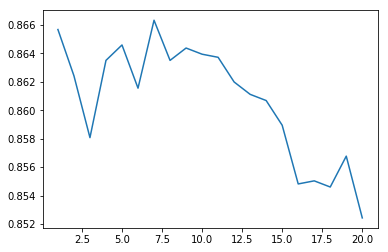

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
lis1 = []
for k in range(1, 21):
    lis1.append(k)
sns.lineplot(lis1 , lis)

#### Q6: Find the accuracy of the models by taking k from 1 to 20. (Using manhattan distance  k(5)-fold method for train-test split)

In [128]:
lis = []
for k in range(1,21):
    knn_cv = KNeighborsClassifier(n_neighbors=k, metric = 'manhattan')
    scores = cross_val_score(knn_cv, X_trans, Y, cv=5, scoring='accuracy')
    print("Accuracy score for k : " +str(k) + " ", scores.mean())
    lis.append(scores.mean());

Accuracy score for k : 1  0.8652459519425955
Accuracy score for k : 2  0.8659021385072936
Accuracy score for k : 3  0.8648118774488976
Accuracy score for k : 4  0.8665519520370107
Accuracy score for k : 5  0.8724191568710757
Accuracy score for k : 6  0.8698142378322238
Accuracy score for k : 7  0.8737244488504933
Accuracy score for k : 8  0.8709011943539631
Accuracy score for k : 9  0.8769862625690413
Accuracy score for k : 10  0.8724217532927347
Accuracy score for k : 11  0.8767683991880281
Accuracy score for k : 12  0.8695973186045414
Accuracy score for k : 13  0.8754647594769391
Accuracy score for k : 14  0.8685105981211348
Accuracy score for k : 15  0.8717700514563566
Accuracy score for k : 16  0.8680769957041023
Accuracy score for k : 17  0.873509890006137
Accuracy score for k : 18  0.8667712316480196
Accuracy score for k : 19  0.871335268847661
Accuracy score for k : 20  0.8650330453665676


#### Q7:  Plot the graph between k and the accuracy score and find the best value of k

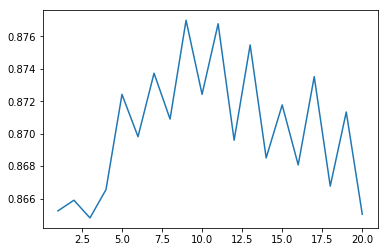

In [129]:
sns.lineplot(lis1 , lis)

#### Q8: Write your observation

In [130]:
#Best K value for Euclidean was 7 with accuracy of 0.8663345607326631
#Best K value for Manhatan was 9 with accuracy of  0.8769862625690413
# Best case  accuracy of Manhatan was better than euclidean

#### Q9: Implement the weighted k-NN model. Use k(5)-fold method for train-test split

In [131]:
#### Code here ###
import numpy as np
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean' , weights= 'distance') 
scores = cross_val_score(knn, X_trans, Y, cv=5, scoring='accuracy')
print("Accuracy score", scores.mean())

Accuracy score 0.863073455129113


#### Q10: What is the best k value in this model. Take max k =20

In [132]:
#### Write your answer here ####
for k in range(1,21):
    knn_cv = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean', weights= 'distance')
    scores = cross_val_score(knn_cv, X_trans, Y, cv=5, scoring='accuracy')
    print("Accuracy score for k : " +str(k) + " ", scores.mean())
    lis.append(scores.mean());

Accuracy score for k : 1  0.8656814426662891
Accuracy score for k : 2  0.8658988339706368
Accuracy score for k : 3  0.863073455129113
Accuracy score for k : 4  0.8693775669168673
Accuracy score for k : 5  0.8719834301090497
Accuracy score for k : 6  0.8761131567766606
Accuracy score for k : 7  0.8774184487560779
Accuracy score for k : 8  0.8745935419912195
Accuracy score for k : 9  0.8754626351319456
Accuracy score for k : 10  0.8743763867252042
Accuracy score for k : 11  0.8739413680781759
Accuracy score for k : 12  0.8743775669168674
Accuracy score for k : 13  0.8737251569654912
Accuracy score for k : 14  0.8758971817023085
Accuracy score for k : 15  0.873507293584478
Accuracy score for k : 16  0.8761155171599867
Accuracy score for k : 17  0.8732903743567956
Accuracy score for k : 18  0.8772027097200585
Accuracy score for k : 19  0.8776363121370911
Accuracy score for k : 20  0.8774189208327432


In [133]:
#Best value of K is 19